In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train = pd.read_pickle('titanic-clean.pkl')
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [3]:
X = train.drop('Survived', axis=1).values
# X = train.values
Y = train['Survived'].values

In [4]:
type(Y)

numpy.ndarray

In [5]:
X.shape

(889, 7)

In [6]:
X[:5, :]

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ,  2.    ],
       [ 1.    ,  0.    , 35.    ,  1.    ,  0.    , 53.1   ,  2.    ],
       [ 3.    ,  1.    , 35.    ,  0.    ,  0.    ,  8.05  ,  2.    ]])

In [7]:
Y[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=101)

In [9]:
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical

In [10]:
tf.__version__

'2.4.1'

In [11]:
Y[0]

0

In [19]:
Y = to_categorical(Y)  

In [20]:
Y[1]

array([0., 1.], dtype=float32)

In [16]:
# y_train_cat = to_categorical(y_train)  # needed only when you are going to use "softmax" in o/p layer
# y_test_cat = to_categorical(y_test)

In [14]:
y_train[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
K.clear_session()

In [21]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu', kernel_initializer='glorot_normal')) #, \
#                kernel_regularizer='l2')) # 1st Hidden Layer
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))  # 2nd Hidden Layer
model.add(Dense(2, activation='softmax')) # Output Layer 
# if using sigmoid, then go for 1 neuron in the o/p layer
# if using softmax, then go no. of neurons in the o/p layer == no. of classes.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 2,658
Trainable params: 2,658
Non-trainable params: 0
_________________________________________________________________


In [23]:
h = model.fit(X,Y, batch_size=200, epochs=50, verbose=1, validation_split=0.3)

Epoch 1/50
4/4 [==============================] - 2s 498ms/step - loss: 3.0210 - accuracy: 0.3916 - val_loss: 1.9196 - val_accuracy: 0.3558
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 1.9745 - accuracy: 0.4038 - val_loss: 1.2663 - val_accuracy: 0.5730
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 1.3159 - accuracy: 0.6105 - val_loss: 1.2327 - val_accuracy: 0.6704
Epoch 4/50
4/4 [==============================] - 0s 20ms/step - loss: 1.2865 - accuracy: 0.6113 - val_loss: 1.2817 - val_accuracy: 0.6442
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 1.2682 - accuracy: 0.6134 - val_loss: 1.0849 - val_accuracy: 0.6966
Epoch 6/50
4/4 [==============================] - 0s 23ms/step - loss: 1.1220 - accuracy: 0.6366 - val_loss: 0.9749 - val_accuracy: 0.7041
Epoch 7/50
4/4 [==============================] - 0s 29ms/step - loss: 1.0600 - accuracy: 0.6651 - val_loss: 0.9587 - val_accuracy: 0.7116
Epoch 8/50
4/4 [==========

In [24]:
# h.history

Text(0.5, 0, 'Epochs')

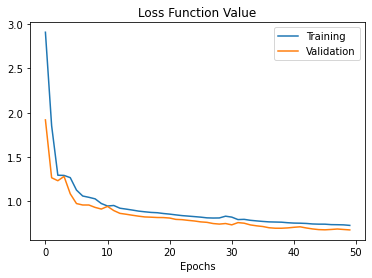

In [24]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss Function Value')
plt.xlabel('Epochs')
# plt.ylim([0,1])

Text(0.5, 0, 'Epochs')

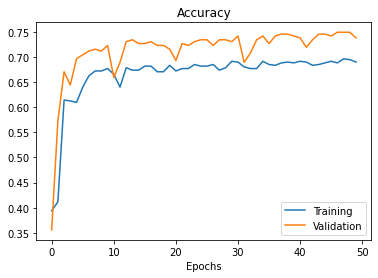

In [25]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
# plt.ylim([0,1])

In [28]:
# test_accuracy = model.evaluate(X_test, y_test)[1]
# test_accuracy